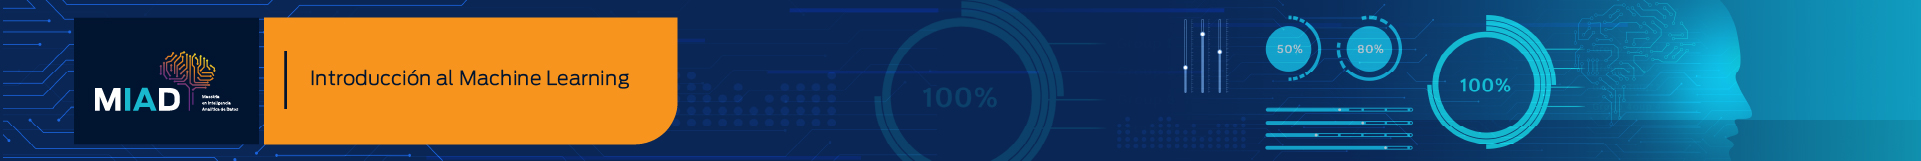

# Introducción al Machine Learning - Semana 3
## Caso: Implementación de modelos de clasificación lineales

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de clasificación. En particular, se deberán implementar modelos de linear discriminant analysis, quadratic discriminant analysis, naive bayes classifier y regresión logística.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).


### Criterios de evaluación

Los criterios que se evaluarán son: 

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación modelo LDA: Se estima el modelo usando LDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo QDA: Se estima el modelo usando QDA, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo NBC: Se estima el modelo usando NBC, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo de regresión logística: Se estima el modelo usando regresión logística, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos] 


### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "SMarket", la cual contiene 8 variables predictivas sobre el índice financiero S&P500 y 1250 observaciones. De esta manera, el objetivo de la actividad es predecir si el precio del índice subirá o bajará al día siguiente.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-smarket

### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [1]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


#data = pd.read_csv("dataset-18213.csv")
data = pd.read_csv("data/dataset-18213.csv")
data.columns


Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

C:\Users\paulg\AppData\Local\Temp\ipykernel_21664\868735032.py:158: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns_plot = sns.lineplot(y1, palette=['red'], linewidth=2.5,ax=ax[0])


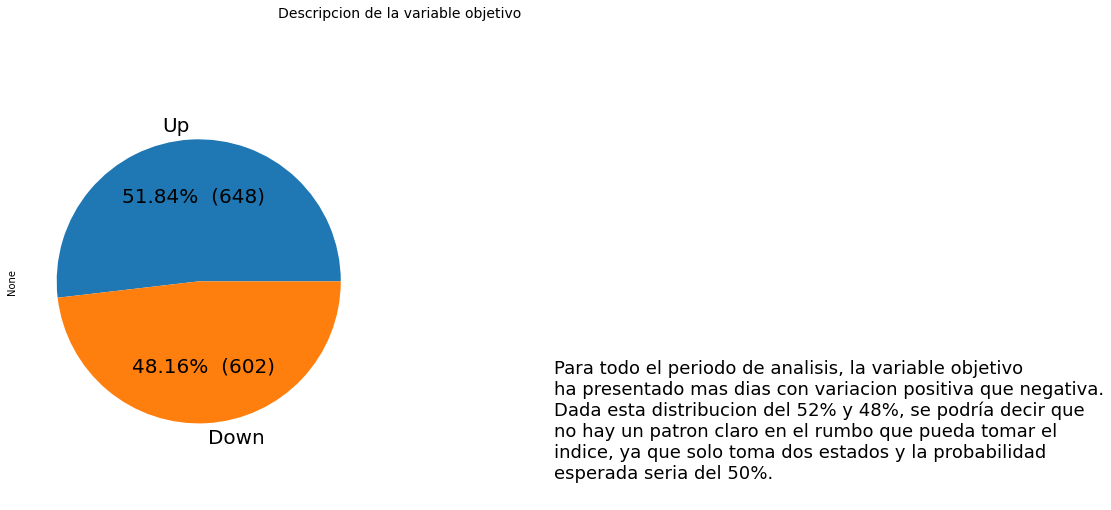

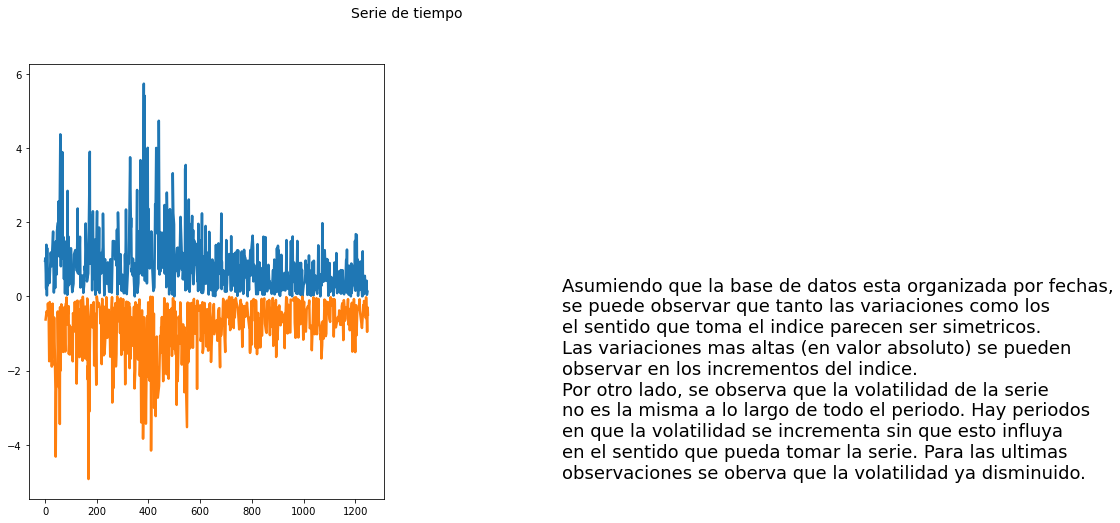

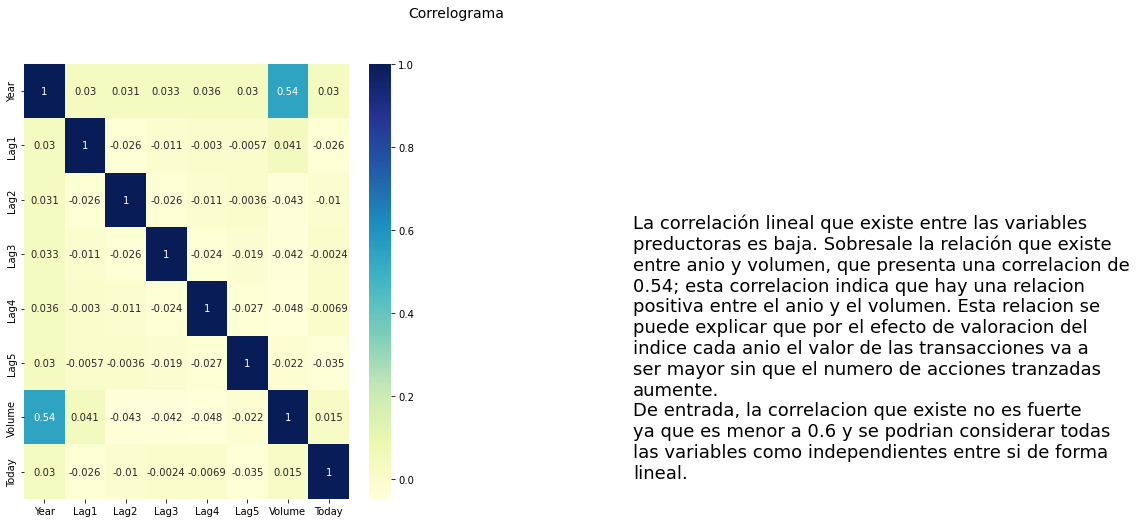

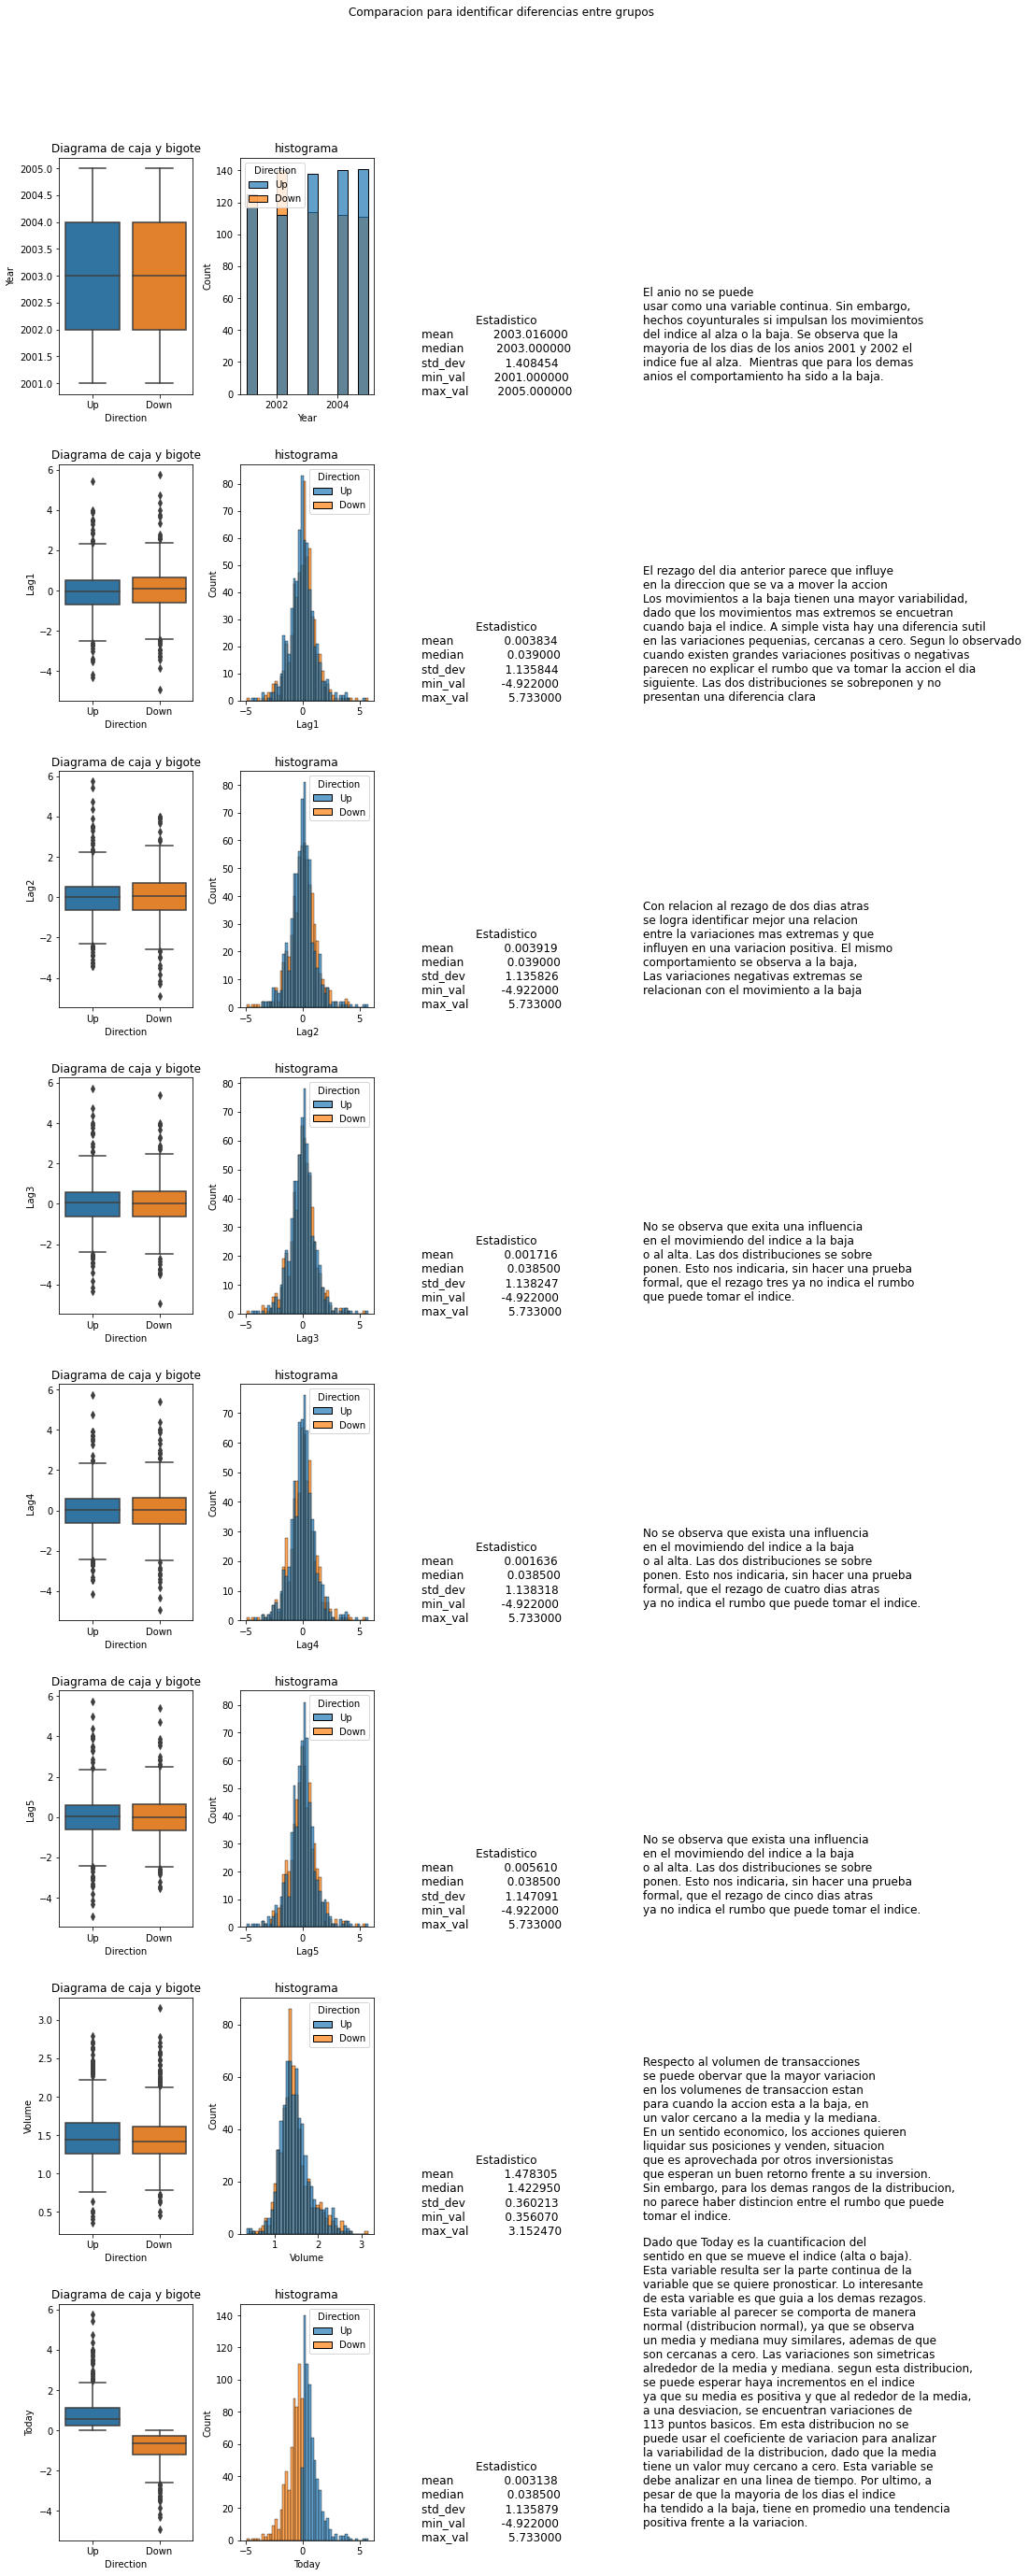

In [2]:
grilla = [4,2]
variables = ['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']
grupo = 'Direction'

descripcion_variable_objetivo = """
Para todo el periodo de analisis, la variable objetivo
ha presentado mas dias con variacion positiva que negativa.
Dada esta distribucion del 52% y 48%, se podría decir que
no hay un patron claro en el rumbo que pueda tomar el 
indice, ya que solo toma dos estados y la probabilidad
esperada seria del 50%.
"""

descripcion_serie = """
Asumiendo que la base de datos esta organizada por fechas,
se puede observar que tanto las variaciones como los 
el sentido que toma el indice parecen ser simetricos.
Las variaciones mas altas (en valor absoluto) se pueden 
observar en los incrementos del indice.
Por otro lado, se observa que la volatilidad de la serie
no es la misma a lo largo de todo el periodo. Hay periodos
en que la volatilidad se incrementa sin que esto influya 
en el sentido que pueda tomar la serie. Para las ultimas
observaciones se oberva que la volatilidad ya disminuido.
"""

descripcion_correlograma = """
La correlación lineal que existe entre las variables
preductoras es baja. Sobresale la relación que existe 
entre anio y volumen, que presenta una correlacion de 
0.54; esta correlacion indica que hay una relacion 
positiva entre el anio y el volumen. Esta relacion se
puede explicar que por el efecto de valoracion del
indice cada anio el valor de las transacciones va a 
ser mayor sin que el numero de acciones tranzadas
aumente.
De entrada, la correlacion que existe no es fuerte
ya que es menor a 0.6 y se podrian considerar todas 
las variables como independientes entre si de forma
lineal.
"""

conclusiones ={}
conclusiones['Year'] ="""El anio no se puede 
usar como una variable continua. Sin embargo,
hechos coyunturales si impulsan los movimientos
del indice al alza o la baja. Se observa que la 
mayoria de los dias de los anios 2001 y 2002 el 
indice fue al alza.  Mientras que para los demas
anios el comportamiento ha sido a la baja.
"""

conclusiones['Lag1'] ="""El rezago del dia anterior parece que influye 
en la direccion que se va a mover la accion  
Los movimientos a la baja tienen una mayor variabilidad,
dado que los movimientos mas extremos se encuetran
cuando baja el indice. A simple vista hay una diferencia sutil
en las variaciones pequenias, cercanas a cero. Segun lo observado
cuando existen grandes variaciones positivas o negativas
parecen no explicar el rumbo que va tomar la accion el dia
siguiente. Las dos distribuciones se sobreponen y no 
presentan una diferencia clara"""

conclusiones['Lag2'] ="""
Con relacion al rezago de dos dias atras 
se logra identificar mejor una relacion 
entre la variaciones mas extremas y que
influyen en una variacion positiva. El mismo
comportamiento se observa a la baja,
Las variaciones negativas extremas se
relacionan con el movimiento a la baja
"""
conclusiones['Lag3'] ="""
No se observa que exita una influencia
en el movimiendo del indice a la baja 
o al alta. Las dos distribuciones se sobre
ponen. Esto nos indicaria, sin hacer una prueba
formal, que el rezago tres ya no indica el rumbo
que puede tomar el indice.
"""
conclusiones['Lag4'] ="""
No se observa que exista una influencia
en el movimiendo del indice a la baja 
o al alta. Las dos distribuciones se sobre
ponen. Esto nos indicaria, sin hacer una prueba
formal, que el rezago de cuatro dias atras
ya no indica el rumbo que puede tomar el indice.
"""

conclusiones['Lag5'] ="""
No se observa que exista una influencia
en el movimiendo del indice a la baja 
o al alta. Las dos distribuciones se sobre
ponen. Esto nos indicaria, sin hacer una prueba
formal, que el rezago de cinco dias atras
ya no indica el rumbo que puede tomar el indice.
"""
conclusiones['Volume'] ="""
Respecto al volumen de transacciones
se puede obervar que la mayor variacion
en los volumenes de transaccion estan 
para cuando la accion esta a la baja, en 
un valor cercano a la media y la mediana.
En un sentido economico, los acciones quieren
liquidar sus posiciones y venden, situacion
que es aprovechada por otros inversionistas 
que esperan un buen retorno frente a su inversion.
Sin embargo, para los demas rangos de la distribucion,
no parece haber distincion entre el rumbo que puede 
tomar el indice.
"""
conclusiones['Today'] ="""
Dado que Today es la cuantificacion del 
sentido en que se mueve el indice (alta o baja).
Esta variable resulta ser la parte continua de la
variable que se quiere pronosticar. Lo interesante
de esta variable es que guia a los demas rezagos.
Esta variable al parecer se comporta de manera
normal (distribucion normal), ya que se observa 
un media y mediana muy similares, ademas de que
son cercanas a cero. Las variaciones son simetricas
alrededor de la media y mediana. segun esta distribucion,
se puede esperar haya incrementos en el indice 
ya que su media es positiva y que al rededor de la media,
a una desviacion, se encuentran variaciones de 
113 puntos basicos. Em esta distribucion no se 
puede usar el coeficiente de variacion para analizar
la variabilidad de la distribucion, dado que la media
tiene un valor muy cercano a cero. Esta variable se 
debe analizar en una linea de tiempo. Por ultimo, a 
pesar de que la mayoria de los dias el indice
ha tendido a la baja, tiene en promedio una tendencia
positiva frente a la variacion.
"""
def summary_statistics(data):
    resultados = {}
    resultados["mean"] = np.mean(data)
    resultados["median"] = np.median(data)
    resultados["std_dev"] = np.std(data)
    resultados["min_val"] = np.min(data)
    resultados["max_val"] = np.max(data)
    return resultados

def grafico_torta(data, variable=grupo):
    fig, ax = plt.subplots(ncols=2, figsize=(14, 8))
    data.groupby(grupo).size().sort_index(ascending=False).plot(kind='pie', ax=ax[0],textprops={'fontsize': 20},autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(data.groupby(grupo).size())/100)) #,autopct='%.2f'
    #ax[0].set_ylabel('Direccion indicador', size=22)
    ax[1].text(0.3,0,descripcion_variable_objetivo,size=18)
    ax[1].axis('off')
    fig.suptitle('Descripcion de la variable objetivo', fontsize=14)
grafico_torta(data, variable=grupo)

def grafico_linea(data, variable="Today"):
    fig, ax = plt.subplots(ncols=2, figsize=(14, 8))
    y1 = [i if i >= 0 else None for i in data["Today"]]
    y2 = [i if i < 0 else None for i in data["Today"]]
    x = data.index.to_series()
    sns_plot = sns.lineplot(y1, palette=['red'], linewidth=2.5,ax=ax[0])
    sns_plot = sns.lineplot(y2, linewidth=2.5,ax=ax[0])
    ax[1].text(0.3,0,descripcion_serie,size=18)
    ax[1].axis('off')
    fig.suptitle('Serie de tiempo', fontsize=14)

grafico_linea(data)


#sns.lineplot(x = data.index, y = "Today", data = data)


def correlograma(data,tamanio=(16,8)):
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=tamanio)
    corr = data.corr()
    sns.heatmap(corr, cmap="YlGnBu", annot=True,ax=ax[0])
    ax[1].text(0.3,0,descripcion_correlograma,size=18)
    ax[1].axis('off')
    fig.suptitle('Correlograma', fontsize=14)
correlograma(data)

def grafico_doble(variables,data,grupo,grilla):
    contador = 0
    fig, ax = plt.subplots(nrows=len(variables), ncols=4, figsize=(15, 45))
    for i in range(0,len(variables)):
        sns.boxplot(ax=ax[i,0],x=grupo, y=variables[i], data=data, palette='tab10')
        ax[i,0].set_title("Diagrama de caja y bigote")
        sns.histplot(ax=ax[i,1],data = data,x = variables[i],alpha = .7,hue = grupo)
        ax[i,1].set_title("histograma")
        ax[i,2].text(0,0,str(pd.DataFrame.from_dict(summary_statistics(data[variables[i]]),orient="index").rename(columns={0:"      Estadistico"})),size=12)
        ax[i,2].axis('off')
        ax[i,3].text(0.3,0,str(conclusiones[variables[i]]),size=12)
        ax[i,3].axis('off')
    plt.tight_layout()
    fig.subplots_adjust(top=0.8)
    fig.suptitle("Comparacion para identificar diferencias entre grupos", y=0.85,fontsize=12)
    plt.show()

grafico_doble(variables,data,grupo,grilla)

In [3]:
# Se elimina la variable "Today", ya que la variable objetivo es una transformacion de esta variable
data  = data.drop(columns=["Today"])

pct_test =  0.2
limite_train = int(np.round(len(data) * (1-pct_test)))

XTrain = data[:limite_train].drop(columns="Direction")
yTrain = data.loc[:limite_train-1,["Direction"]]

XTest = data[limite_train+1:].drop(columns="Direction")
yTest = data.loc[limite_train+1:,["Direction"]]

XTrain, XTest, yTrain, yTest = train_test_split(data.drop(columns="Direction"), data["Direction"], test_size=0.2, random_state=0)


Esta descrito al interior de las gráficas

### 2. Estimación modelo LDA (20 puntos)
Estimen un modelo predictivo con LDA usando la muestra de entrenamiento, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

In [4]:
#### declara funcion de entrenamiento modelos

#XTrainLDA = XTrain.drop(columns=["Year"])
#XTestLDA = XTest.drop(columns=["Year"])

def error_clasificacion(XTrain,yTrain,XTest,yTest,modelo="LDA"):
    modelos = {"LDA":LinearDiscriminantAnalysis(),
                "QDA" : QuadraticDiscriminantAnalysis(),
                "NBC" : GaussianNB(),
                "RegLog": LogisticRegression(random_state=0,max_iter=10000)}
    
    model = modelos[modelo]
    
    
    
    # train - predict de los modelos
    model.fit(XTrain, yTrain)
    predict=model.predict(XTest)
    predict_prob=model.predict_proba(XTest)


    error=0
    for i in range(0,len(yTest)):
        if(yTest.iloc[i]!=predict[i]):
            error+=1/len(yTest)
    print('El error de clasificación para {modelo} en la muestra de test es:{s}'.format(modelo=modelo,s=error))
    
    print(confusion_matrix(y_true=yTest, y_pred=predict))
    accuracy=accuracy_score(y_true=yTest, y_pred=predict)
    print(accuracy)
    precisionRegLog= precision_score(y_true=yTest.values, y_pred=predict, pos_label = "Up")
    print(precisionRegLog)
    
    # curva roc para Train
    fig, ax = plt.subplots(ncols=2, figsize=(16, 8))
    fpr, tpr, thresholds = roc_curve((yTrain == "Up").astype(int), (model.predict(XTrain) == "Up").astype(int))
    AUC_train=metrics.auc(fpr, tpr)
    ax[0].set_title('Curva ROC para el entrenamiento')
    ax[0].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_train)
    ax[0].legend(loc = 'lower right')
    ax[0].plot([0, 1], [0, 1],'r--')
    ax[0].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_xlabel('False Positive Rate')

    # curva roc para Test
    fpr, tpr, thresholds = roc_curve((yTest == "Up").astype(int), (predict == "Up").astype(int))
    AUC_test=metrics.auc(fpr, tpr)
    ax[1].set_title('Curva ROC para el conjunto de prueba')
    ax[1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_test)
    ax[1].legend(loc = 'lower right')
    ax[1].plot([0, 1], [0, 1],'r--')
    ax[1].axis(xmin=-0.01,xmax=1,ymin=0,ymax=1.05)
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_xlabel('False Positive Rate')

    return AUC_train, AUC_test, error

El error de clasificación para LDA en la muestra de test es:0.5200000000000004
[[26 97]
 [33 94]]
0.48
0.49214659685863876


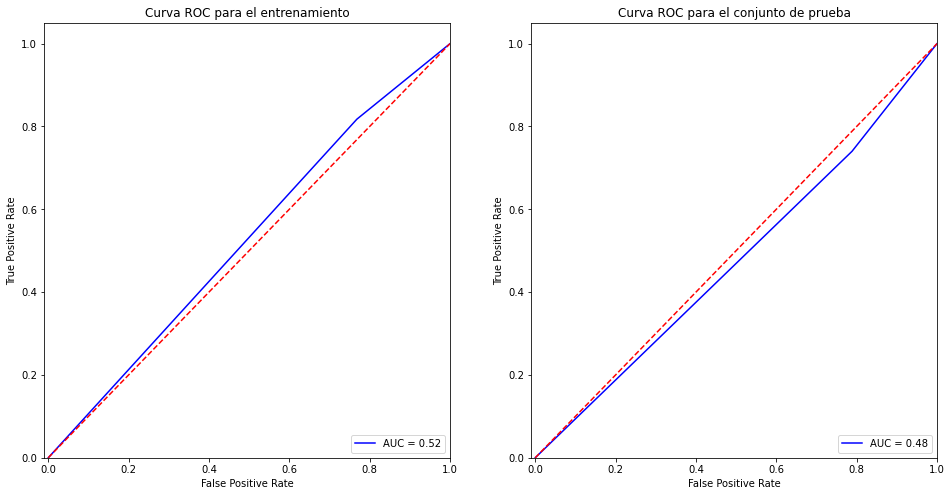

In [5]:
#para este modelo en particular no se tendra en cuenta la variable year ya que no tiene una distribucion normal y sus valores son mas discretos que continuos para el volumen de datos
LDA_AUC_Train, LDA_AUC_Test, errorLDA  = error_clasificacion(XTrain=XTrain.drop(columns=["Year"]),yTrain=yTrain.drop(columns=["Year"]),XTest=XTest.drop(columns=["Year"]),yTest=yTest.drop(columns=["Year"]),modelo="LDA")


Para este punto se usó el método de estimación de modelos Linear Discriminant Analysis. Este análisis realiza los supuestos de que cada variable de observaciones tiene una distribución Normal, con media $\mu_k$, y las covarianzas $\Sigma_k$, son iguales para cada $k$.

Al observar las graficas anteriores es evidente que el modelo esta sobre ajustado (overfitted) ya que el modelo tiene un "buen" desempeño en los datos de entrenamiento, mientras que tiene un comportamiento deficiente para el conjunto de test. Eso sucede a pesar de que parte de los supuestospara implementar este metodo se cumplen, como variables continuas con distribucion normal.

### 3. Estimación modelo QDA (20 puntos)
Estimen un modelo predictivo usando QDA, evalúen su desempeño en la muestra de test y concluyan sobre el poder predictivo del modelo estimado.

El error de clasificación para QDA en la muestra de test es:0.5120000000000003
[[30 93]
 [35 92]]
0.488
0.4972972972972973


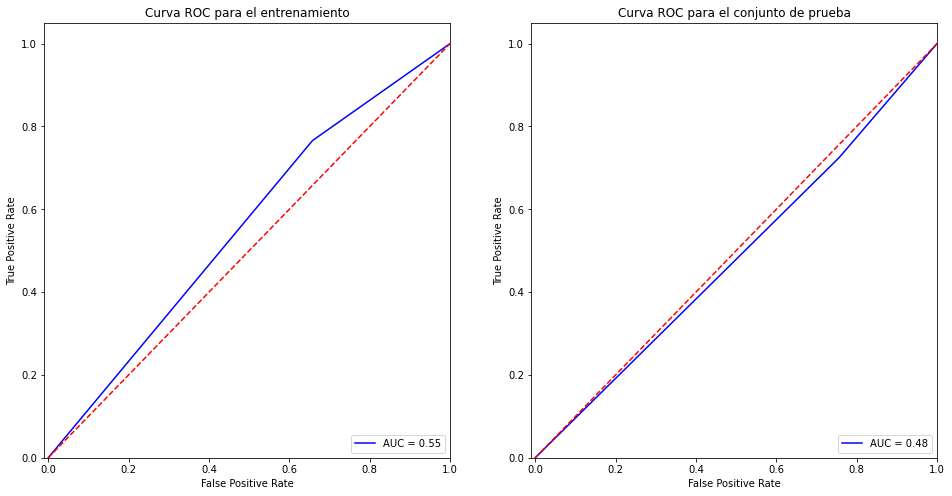

In [6]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####
QDA_AUC_Train, QDA_AUC_Test, errorQDA = error_clasificacion(XTrain,yTrain,XTest,yTest,modelo="QDA")


Para este punto se usó el método de estimación de modelos Quadratic Discriminant Analysis. Este análisis realiza los supuestos de que cada variable de observaciones tiene una distribución Normal, con media $\mu_k$, y una matriz de covarianza $\Sigma_k$, particular para cada $k$.

En este caso podemos ver que el AUC para los datos de entrenamiento al usar el modelo de discriminante cuadrático es de 0.55. Esto puede indicar que el modelo se ajusta mejor a los datos de prueba elegidos al partir la muestra. Al menos, mejor que en el modelo derivado de LDA. Debido a los supuestos del método LDA, podría decirse que tiene un acercamiento poco conservador, pues es casi imposible que todas las observaciones $k$ tengan una matriz de covarianza común entre sí en una muestra de datos de la vida real. El método QDA ataca esta aparente falta de flexibilidad asignando la matriz $\Sigma_k$ a cada variable y computando el modelo acorde a esto. Sin embargo, el método LDA es mejor estimando la frontera Bayesiana de discriinación mientras las matrices de covarianza no sean muy pronunciadamente diferentes. Es decir, un conjunto de variables $X$ con varianza ligeramente diferente entre sí, es mejor aproximado por el método LDA. Los resultados de este punto parecen indicar que los datos sí tienen matrices de covarianza marcadamente diferentes, pues el ajuste es mejor al probar con los datos de entrenamiento.

Por otro lado, se puede ver que, al examinar el modelo hallado probando los datos de Prueba, el AUC fue inferior a 0.5. Esto puede haberse debido a que la partición de los datos tuvo una selección desafortunada, y los datos de prueba no se ajustan bien a los modelos estimados con las muestras de entrenamiento obtenidas al partir los datos, es decir el modelo esta sobre ajustado.

### 4. Estimación modelo NBC (20 puntos)
Predigan usando Naive Bayes Classifier y evalúen su poder predictivo en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

El error de clasificación para NBC en la muestra de test es:0.48000000000000037
[[38 85]
 [35 92]]
0.52
0.519774011299435


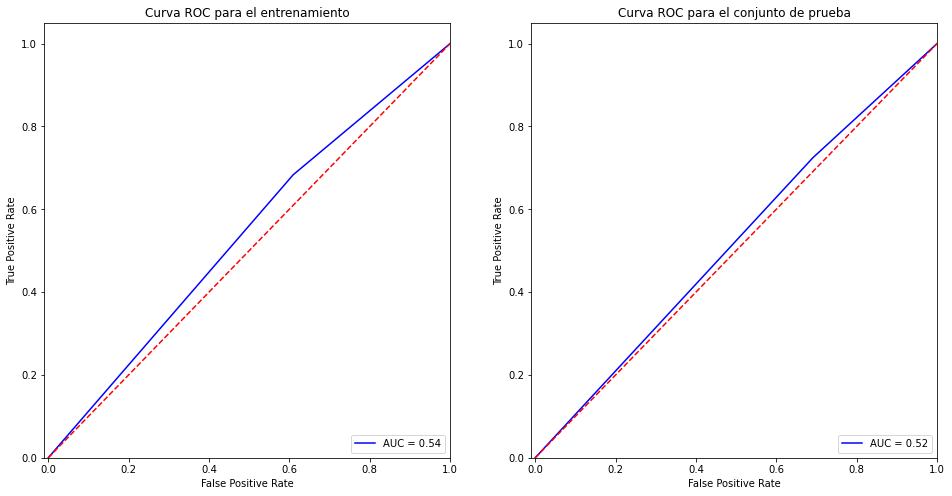

In [7]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####

NBC_AUC_Train, NBC_AUC_Test, errorNBC = error_clasificacion(XTrain,yTrain,XTest,yTest,modelo="NBC")

Para este punto se usó el método de estimación de modelos Naive Bayes Classifier, que supone que los predictores son independientes entre sí. En general, se asume que las distribuciones de los predictores son Normales, con una media y varianza dadas. Este es el modelo más sencillo de clasificación.
El desempeño de es mejor que en los otros dos casos, basados en el hecho de que el AUC en la muestra de Prueba es mayor a 0.5. El método NBC no tiene en cuenta la distribución conjunta de los predictores, de modo que no considera posible correlación entre los datos. Así, el modelo de clasificación resultante de este método es lineal y es ortogonal al vector de diferencia de medias de las variables. Como se vio en el punto 1, los datos muestran una correlación débil, de modo que el mejor desempeño de este modelo se puede deber a esto. Es decir, el hecho de que el modelo estimado con NBC sea un poco mejor que los obtenidos usando LDA y QDA, puede deberse a que los datos están poco correlacionados. De igual manera se resalta que aún no se puede considerar este un modelo con buena capacidad de predicción.

### 5. Estimación modelo regresión logística (20 puntos)
Predigan usando un modelo de regresión logística y evalúen en test. Concluyan sobre el poder predictivo del modelo estimado.

El error de clasificación para RegLog en la muestra de test es:0.4920000000000004
[[  0 123]
 [  0 127]]
0.508
0.508


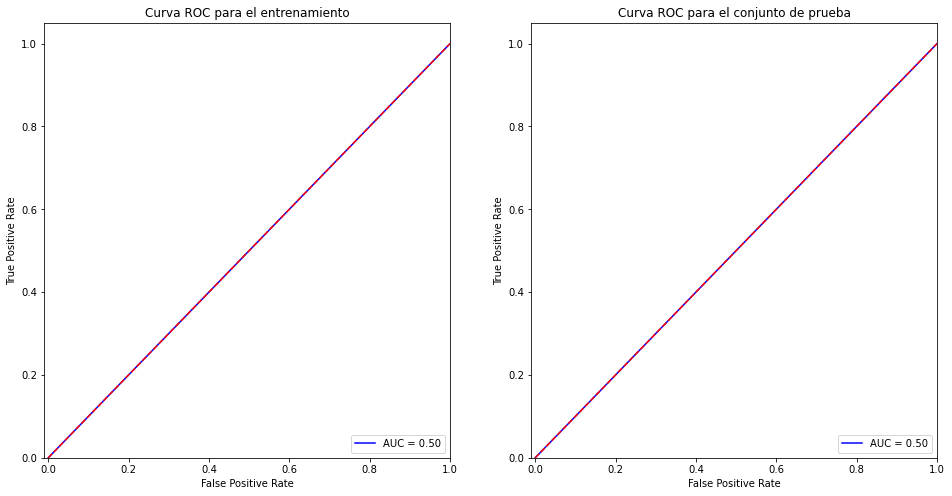

In [8]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####
RL_AUC_Train, RL_AUC_Test, errorRL = error_clasificacion(XTrain,yTrain,XTest,yTest,modelo="RegLog")


Para dar desarrollo al punto 5 se procedió a realizar un modelo de regresión logística con base en las herramientas brindadas por la libreria Sklearn. Una vez realizado el proceso se dio uso a la herramienta para identificar el error de clasificación del modelo y el valor del AUC con el objetivo de ver la calidad del modelo.
El modelo con un AUC de 0.5 es bastante débil un equivalente a adivinar por lo que no se considera muy útil como herramienta predictiva es necesario por lo tanto evaluar la utilidad de la información de esta base para predecir si el precio de una acción puede subir y bajar tal vez sea necesario tener información más allá simplemente de los lag y el volumen de las transacciones con la acción.

### 6. Elección del mejor modelo (10 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

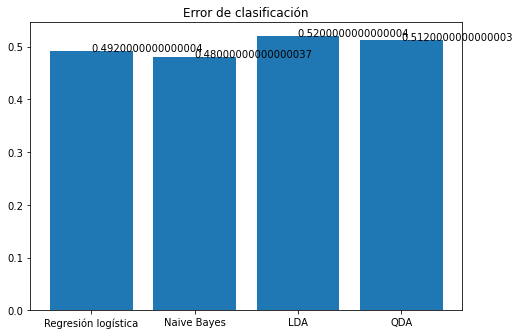

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Error de clasificación")
ejeX = ['Regresión logística', 'Naive Bayes','LDA','QDA']
ejeY = [errorRL,errorNBC,errorLDA,errorQDA]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

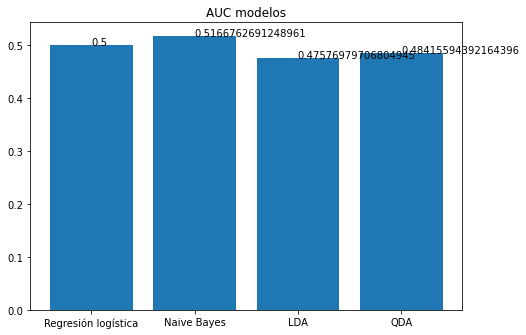

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("AUC modelos")
ejeX = ['Regresión logística', 'Naive Bayes','LDA','QDA']
ejeY = [RL_AUC_Test,NBC_AUC_Test,LDA_AUC_Test,QDA_AUC_Test]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Como se puede observar en las gráficas anteriores si se realiza una comparación de los diferentes modelos utilizados se puede identificar que el modelo Naive Bayes tiene menor error de clasificación. Si se toma en cuenta esta observación se podría llegar a la decisión apresurada de elegirlo como el mejor modelo, pero si se hace una revisión más exhaustiva tomando el AUC de cada uno de los diferentes modelos podemos observar que el QDA es aquel que tiene el mayor valor y por lo tanto será el más beneficioso para utilizar.

ValueError: Could not interpret input 'Today'

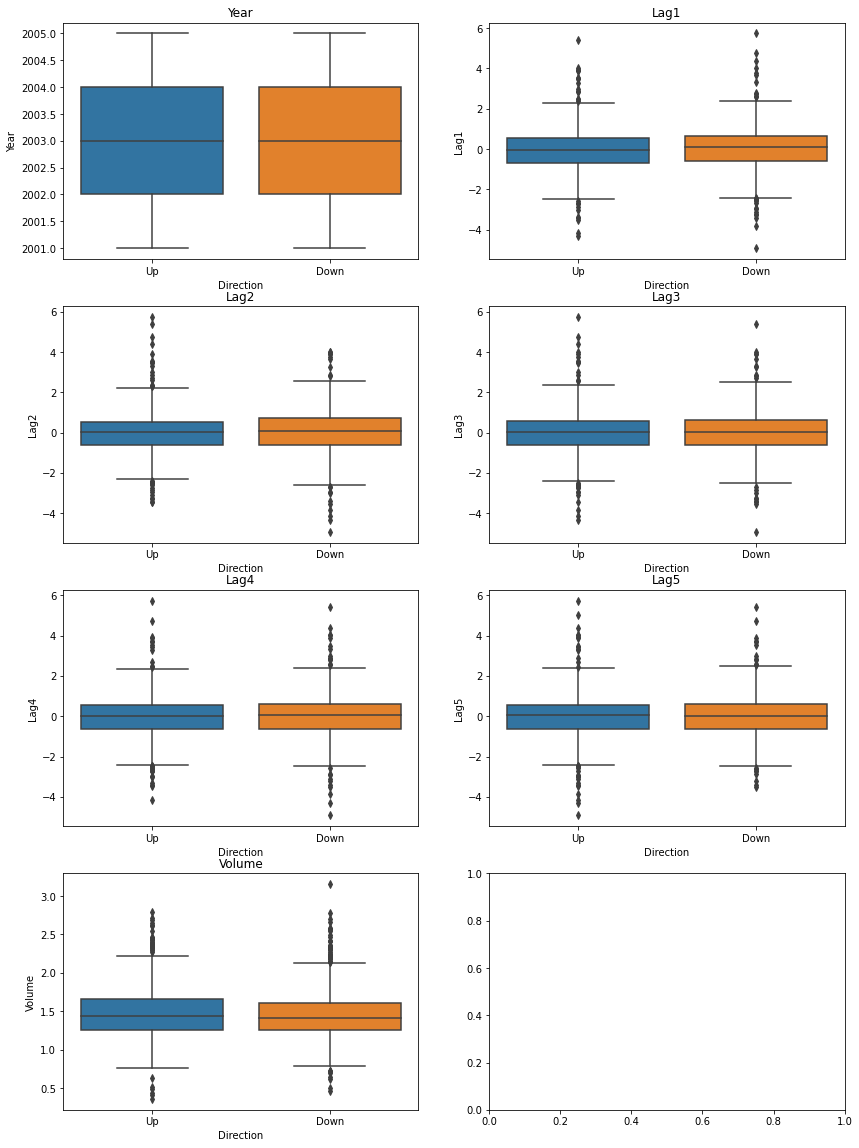

In [11]:
### VARIOS

def grafico_caja(variables,data,grupo,grilla):
    contador = 0
    fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
    for i in range(0,grilla[0]):
        for j in range(0,grilla[1]):
            if contador <= len(variables):
                sns.boxplot(ax=ax[i,j],x=grupo, y=variables[contador], data=data, palette='tab10')
                ax[i,j].set_title(variables[contador])
                contador+=1
    plt.tight_layout()
    fig.subplots_adjust(top=0.8)
    fig.suptitle("Comparacion para identificar diferencias entre grupos", y=0.85,fontsize=14)
    plt.show()

grafico_caja(variables,data,grupo,grilla)
